# Annual Average Temperatures Across the UK Statistics Code
This is the entirety of Group 3's python code for the statistics project it is looking at the annual average temperatures across the UK based on location, the two
datasets range from 1981-2000 and 2001-2020.

The code is laid out in order of the Index.
## Index
1. [Import Data from CSV](#Import-Data)
2. [Statistical Analysis](#Statistical-Analysis)
    1. [T-Test](#T-test)
    3. [Cluster Analysis](#Cluster-Analysis)
3. [Graph Plotting](#Figures-and-Plotting)
    1. [UK Temperature Heatmaps](#UK-Temperature-Heatmaps)
    2. [Normal Distribution](#Normal-Distribution-of-Temperature-Changes)
    3. [Cluster Analysis Maps](#Cluster-Analysis-Maps)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Import Data 
The code below reads the csv file using pandas, it then organises the dataframe object and assigns some variables as some of the later functions did not work with raw
string to reference the column headers.

In [2]:
temp_columns = ["'81-'00", "'01-'20"]
xcolumn = ['X']
ycolumn = ['Y']
tTest_ColumnA = ["'81-'00"]
tTest_ColumnB = ["'01-'20"]

In [3]:
df = pd.read_csv('Climate Data.csv', usecols=[4, 5, 6, 7], header = 0, names=['Y','X',"'81-'00","'01-'20"])
df["tempGrad"] = df["'01-'20"] - df["'81-'00"]
tempGrad = ["tempGrad"]

## Statistical Analysis
Most standard deviations and mean functions are embedded within print commands as they are simple and don't overcomplicate code.

In [4]:
stand_dev = np.std(df[temp_columns], axis=0)

### T-test
Using Scipy's built in T-test functions, independant and relative functions were both used and then results will be compared in report.
The T-test results are printed later on along with the heatmaps of the UK.

In [5]:
trel_statistic, prel_value = scipy.stats.ttest_rel(df[tTest_ColumnA], df[tTest_ColumnB])
tind_statistic, pind_value = scipy.stats.ttest_ind(df[tTest_ColumnA], df[tTest_ColumnB])

### Cluster Analysis
Using sklearn's Kmeans function, this section of code performs Kmeans cluster analysis on each of the two data sets and creates arrays of labels which can then be used to
plot a map of the UK representing the cluster grouping.

Produces a cluster analysis with 3 clusters and 4 clusters to then compare and decide which is more appropriate for use.
Calculates the standard deviations and means of the two different cluster analyses to help with comparison.

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df[tempGrad])
kmeans_2 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df[tempGrad])

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids2 = kmeans_2.cluster_centers_
labels2 = kmeans_2.labels_
df["Cluster Labels1"] = labels
df["Cluster Labels2"] = labels2

In [8]:
stdcluster1 = np.std(df.loc[df['Cluster Labels1'] == 0],axis=0)
stdcluster2 = np.std(df.loc[df['Cluster Labels1'] == 1],axis=0)
stdcluster3 = np.std(df.loc[df['Cluster Labels1'] == 2],axis=0)
stdcluster4 = np.std(df.loc[df['Cluster Labels2'] == 0],axis=0)
stdcluster5 = np.std(df.loc[df['Cluster Labels2'] == 1],axis=0)
stdcluster6 = np.std(df.loc[df['Cluster Labels2'] == 2],axis=0)
stdcluster7 = np.std(df.loc[df['Cluster Labels2'] == 3],axis=0)

In [9]:
cLuster3Mean = pd.DataFrame([stdcluster1,stdcluster2,stdcluster3]).mean()
cLuster4Mean = pd.DataFrame([stdcluster4,stdcluster5,stdcluster6,stdcluster7]).mean()

## Figures and Plotting

### UK Temperature Heatmaps
Produces a subplot of the annual average temperatures across the UK for both year groups as well as the temperature difference between year groups.



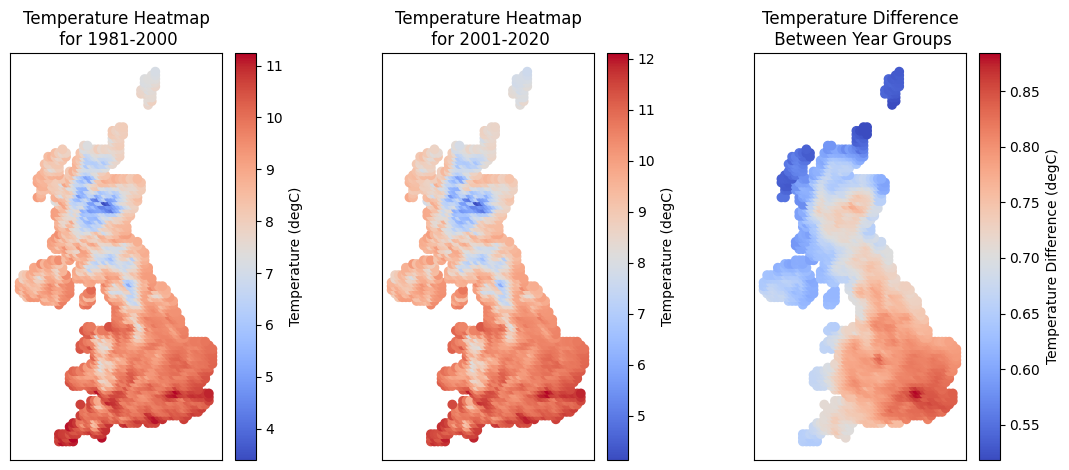

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3)
newTemp = ax[1].scatter(df[xcolumn],df[ycolumn], c=df["'01-'20"], cmap='coolwarm', marker='o')
plt.colorbar(newTemp, label='Temperature (degC)', orientation='vertical')

oldTemp = ax[0].scatter(df[xcolumn],df[ycolumn], c=df["'81-'00"], cmap='coolwarm', marker='o')
plt.colorbar(oldTemp, label='Temperature (degC)', orientation='vertical')

tempGrad = ax[2].scatter(df[xcolumn],df[ycolumn], c=df["tempGrad"], cmap='coolwarm', marker='o')
plt.colorbar(tempGrad, label='Temperature Difference (degC)', orientation='vertical')

ax[0].set_title('Temperature Heatmap\n for 1981-2000')
ax[1].set_title('Temperature Heatmap\n for 2001-2020')
ax[2].set_title('Temperature Difference\n Between Year Groups')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xlabel('')
ax[2].set_ylabel('')
fig.tight_layout()
fig.subplots_adjust(right=1.6)

**Standard Deviations and Means of raw data**

Displays the standard deviations as well as the means using numpy's built-in functions.

In [11]:
print(f'Standard deviation of temperatures \n{np.std(df[temp_columns], axis=0)}\n')
print(f'Means of temperatures \n{df[temp_columns].mean()}\n')
print(f'Standard deviation of temperature gradient \n{round(np.std(df["tempGrad"]),6)}\n')
print(f'Mean of temperature gradient \n{round(df["tempGrad"].mean(),6)}\n')

Standard deviation of temperatures 
'81-'00    1.302442
'01-'20    1.336563
dtype: float64

Means of temperatures 
'81-'00    8.769617
'01-'20    9.489317
dtype: float64

Standard deviation of temperature gradient 
0.077989

Mean of temperature gradient 
0.7197



**T-test Results**

In [12]:
print("T rel-statistic:", trel_statistic)
print("P rel-value:", prel_value)
print("T ind-statistic:", tind_statistic)
print("P ind-value:", pind_value,'\n')

T-test results:
T rel-statistic: [-420.16453627]
P rel-value: [0.]
T ind-statistic: [-17.55859929]
P ind-value: [1.24858295e-66] 



### Normal Distribution of Temperature Changes
Displays a normal distribution of the temperature changes.

Text(0.5, 1.0, 'Normal Distribution of \nTemperature Changes')

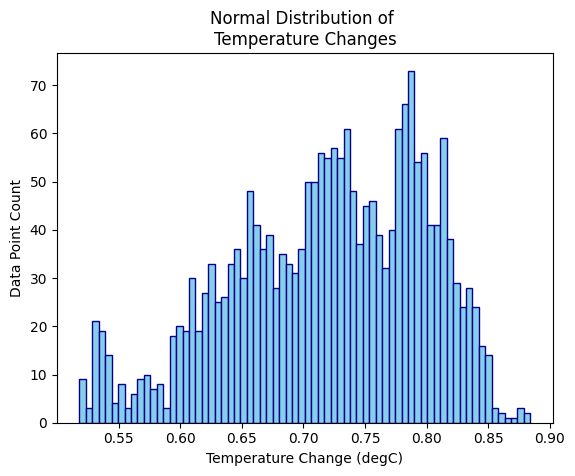

In [17]:
plt.hist(df['tempGrad'], bins=70, color='skyblue',edgecolor='darkblue')
plt.ylabel('Data Point Count')
plt.xlabel('Temperature Change (degC)')
plt.title('Normal Distribution of \nTemperature Changes')

### Cluster Analysis Maps
Produces maps of the UK colour coded to show cluster assignment.


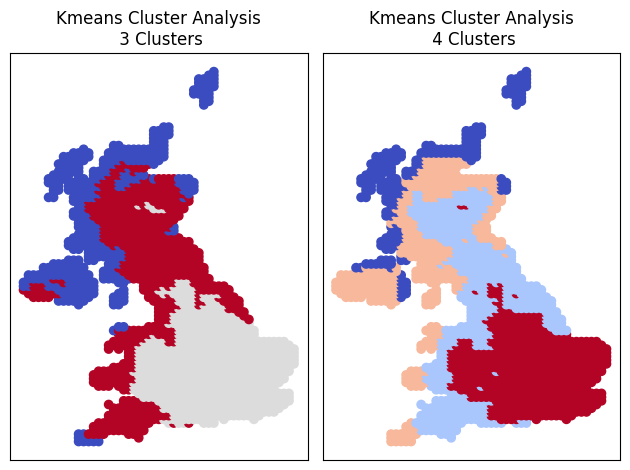

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2)
kMeansCluster= ax[0].scatter(df[xcolumn],df[ycolumn], c=labels, cmap='coolwarm', marker='o')

kMeansCluster1= ax[1].scatter(df[xcolumn],df[ycolumn], c=labels2, cmap='coolwarm', marker='o')

ax[0].set_title('Kmeans Cluster Analysis\n 3 Clusters')
ax[1].set_title('Kmeans Cluster Analysis\n 4 Clusters')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
fig.tight_layout()

**Standard Deviations and Means of Standard Deviations of Cluster Analyses**

Displays standard deviations of clusters as well as showing centroids. The standard deviations and means of the standard deviations were used to figure out which cluster analysis contains better accuracy.

In [16]:
print('Standard deviations of 3 cluster analysis:')
print(f'Cluster 1 (Blue) ={round(stdcluster1["tempGrad"],6)}\nCluster 2 (White) ={round(stdcluster2["tempGrad"],6)}\nCluster 3 (Red) ={round(stdcluster3["tempGrad"],6)}\n')
print('Standard deviations of 4 cluster analysis:')
print(f'Cluster 1 (Blue) ={round(stdcluster4["tempGrad"],6)}\nCluster 2 (Light Blue) ={round(stdcluster5["tempGrad"],6)}\nCluster 3 (Beige) ={round(stdcluster6["tempGrad"],6)}\nCluster 4 (Red) ={round(stdcluster7["tempGrad"],6)}\n')
print(f'3 Cluster Analysis Mean = {round(cLuster3Mean["tempGrad"],6)}')
print(f'4 Cluster Analysis Mean = {round(cLuster4Mean["tempGrad"],6)}\n')
print(f'3 Cluster Centroids - \n{centroids}\n')
print(f'4 Cluster Centroids - \n{centroids2}')

Standard deviations of 3 cluster analysis:
Cluster 1 (Blue) =0.039537
Cluster 2 (White) =0.026791
Cluster 3 (Red) =0.026614

Standard deviations of 4 cluster analysis:
Cluster 1 (Blue) =0.031501
Cluster 2 (Light Blue) =0.019767
Cluster 3 (Beige) =0.021118
Cluster 4 (Red) =0.023317

3 Cluster Analysis Mean = 0.030981
4 Cluster Analysis Mean = 0.023926

3 Cluster Centroids - 
[[0.60706234]
 [0.79562457]
 [0.70705026]]

4 Cluster Centroids - 
[[0.57467109]
 [0.72905588]
 [0.65647852]
 [0.80241906]]
